In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('D:\jupyter\projects\data\healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


---

#### Describe the numerical data ?

In [4]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


#### What are the unique values are in each categorical column (alphabets)?

In [5]:
def unique(df,a,b,c,d,e,f):
        print(df[a].unique())
        print(df[b].unique())
        print(df[c].unique())
        print(df[d].unique())
        print(df[e].unique())
        print(df[f].unique())
        
        
unique(df,'gender','ever_married','work_type','Residence_type','smoking_status','stroke')
    
    

['Male' 'Female']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


### Q: How many missing values are there in each column ?

In [6]:
# df.isna().sum

In [7]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


#### Fill missing bmi values

In [8]:
median_bmi = df["bmi"].median()
df['bmi'].fillna(median_bmi, inplace=True)

### Q: How many positive values of stroke are there ?

In [9]:
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

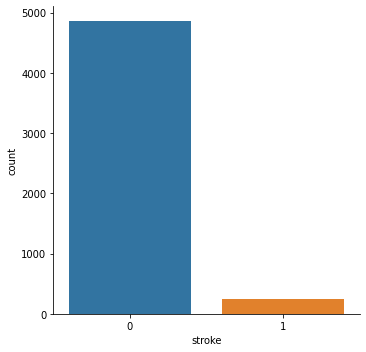

In [10]:
sns.catplot(
    data=df,
    x="stroke",
    kind="count",
    margin_titles=True

)

#### Histograms from HO book

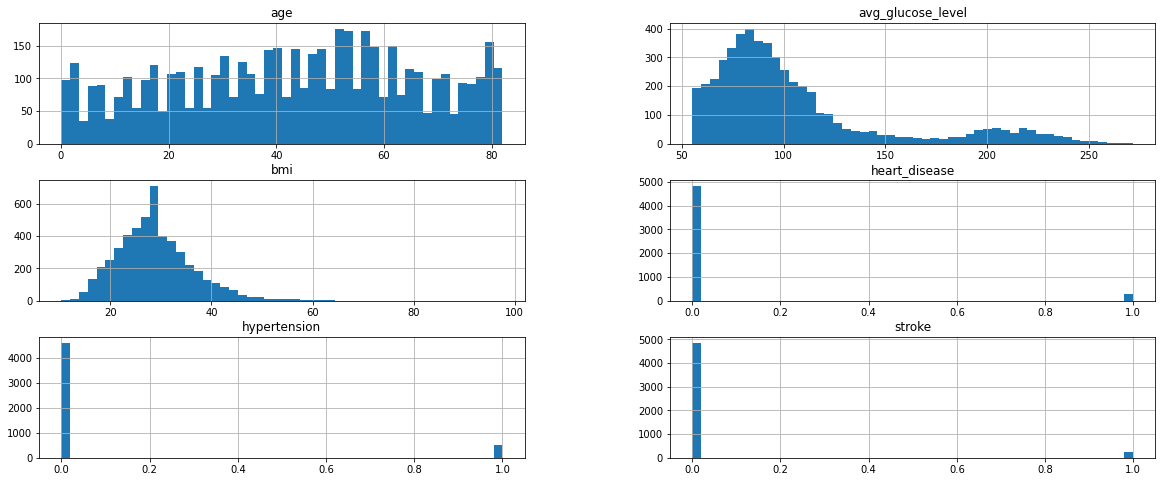

In [11]:
# histograms of stroke = True

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,8))
#save_fig("attribute_histogram_plots")
plt.show()

In [12]:
df_stroke = df[df["stroke"] == 1]

In [13]:
df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


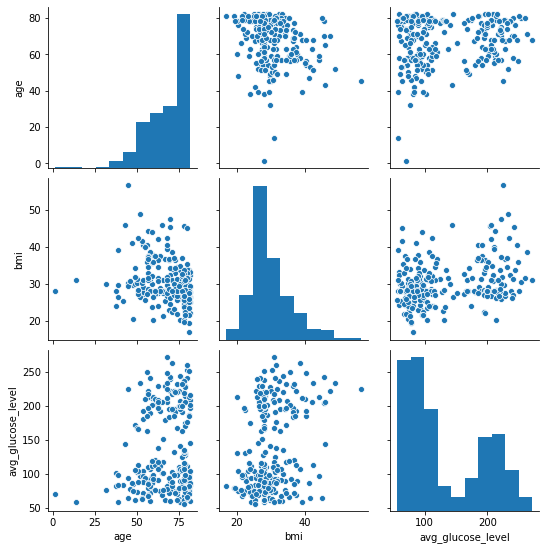

In [14]:
sns.pairplot(df_stroke[["age", "bmi", "avg_glucose_level"]])

### The distribution of bmi in normal group vs stroke group

(<AxesSubplot:xlabel='bmi'>, <AxesSubplot:xlabel='bmi'>)

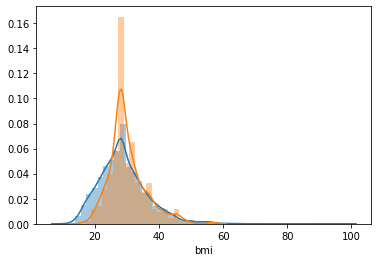

In [15]:
sns.distplot(df["bmi"]), sns.distplot(df_stroke["bmi"])

### The distribution of age in normal group vs stroke group

(<AxesSubplot:xlabel='age'>, <AxesSubplot:xlabel='age'>)

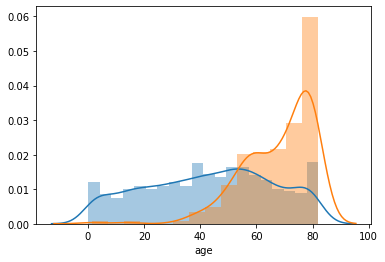

In [16]:
sns.distplot(df["age"]), sns.distplot(df_stroke["age"])

### The distribution of average glucose level in normal group vs stroke group

(<AxesSubplot:xlabel='avg_glucose_level'>,
 <AxesSubplot:xlabel='avg_glucose_level'>)

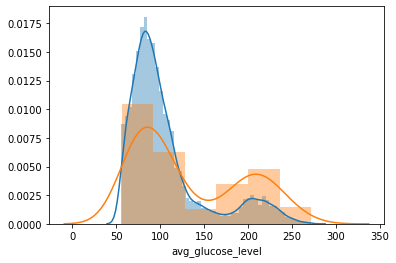

In [17]:
sns.distplot(df["avg_glucose_level"]), sns.distplot(df_stroke["avg_glucose_level"])

#### Applying log for Variance of Data

In [18]:
df.var()

age                   511.373788
hypertension            0.087991
heart_disease           0.051114
avg_glucose_level    2050.731557
bmi                    59.286689
stroke                  0.046371
dtype: float64

### 1. Applying log

In [19]:
df["log_age"] = np.log(df["age"])

In [20]:
df["log_glucose_level"] = np.log(df["avg_glucose_level"])

In [21]:
df["log_bmi"] = np.log(df["bmi"])

In [22]:
df.var()

age                   511.373788
hypertension            0.087991
heart_disease           0.051114
avg_glucose_level    2050.731557
bmi                    59.286689
stroke                  0.046371
log_age                 0.877409
log_glucose_level       0.131032
log_bmi                 0.067501
dtype: float64

In [23]:
to_drop = ['age', 'avg_glucose_level', 'bmi']

In [24]:
df = df.drop(to_drop, axis=1)

In [25]:
df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,log_age,log_glucose_level,log_bmi
0,Male,0,1,Yes,Private,Urban,formerly smoked,1,4.204693,5.432367,3.600048
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1,4.110874,5.309307,3.335770
2,Male,0,1,Yes,Private,Rural,never smoked,1,4.382027,4.662684,3.481240
3,Female,0,0,Yes,Private,Urban,smokes,1,3.891820,5.143008,3.538057
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1,4.369448,5.159745,3.178054


In [26]:
df.var()

hypertension         0.087991
heart_disease        0.051114
stroke               0.046371
log_age              0.877409
log_glucose_level    0.131032
log_bmi              0.067501
dtype: float64

In [411]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
minmax = MinMaxScaler()

In [28]:
df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,log_age,log_glucose_level,log_bmi
0,Male,0,1,Yes,Private,Urban,formerly smoked,1,4.204693,5.432367,3.600048
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1,4.110874,5.309307,3.335770
2,Male,0,1,Yes,Private,Rural,never smoked,1,4.382027,4.662684,3.481240
3,Female,0,0,Yes,Private,Urban,smokes,1,3.891820,5.143008,3.538057
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1,4.369448,5.159745,3.178054


---

### 2. Define the X and y so that the X are the Features and y is the targets

In [29]:
X = df.drop('stroke', axis=1)

In [30]:
y = df['stroke']

### 3. OHE

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

ohe = OneHotEncoder()

In [32]:
ct = make_column_transformer(
    (OneHotEncoder(),['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']),
    remainder='passthrough')

In [33]:
X = ct.fit_transform(X)

In [34]:
X

array([[0.        , 1.        , 1.        , ..., 4.20469262, 5.43236737,
        3.60004824],
       [1.        , 0.        , 1.        , ..., 4.11087386, 5.30930676,
        3.33576958],
       [0.        , 1.        , 1.        , ..., 4.38202663, 4.66268409,
        3.48124009],
       ...,
       [1.        , 0.        , 1.        , ..., 3.55534806, 4.41872012,
        3.42100001],
       [0.        , 1.        , 1.        , ..., 3.93182563, 5.11373325,
        3.24259235],
       [1.        , 0.        , 1.        , ..., 3.78418963, 4.44593996,
        3.26575941]])

### 4. Split the data into Testing and Training

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [36]:
train_X, X_test, train_y, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)




### 5. Upscaling Data due to class imbalance

In [349]:
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE


In [351]:
smk = SMOTE(random_state=139)

In [39]:
X_train, y_train = smk.fit_sample(train_X, train_y)

---

In [353]:
X_train

array([[1.        , 0.        , 1.        , ..., 3.87120101, 4.23714536,
        3.49953328],
       [1.        , 0.        , 1.        , ..., 3.36729583, 4.43307615,
        3.05400118],
       [1.        , 0.        , 1.        , ..., 3.55534806, 4.7824792 ,
        3.13113691],
       ...,
       [1.        , 0.        , 0.        , ..., 4.09061775, 5.21871439,
        3.26758104],
       [0.        , 1.        , 1.        , ..., 4.29110848, 4.32556314,
        3.40985359],
       [1.        , 0.        , 1.        , ..., 4.30876286, 4.40108325,
        3.32555381]])

In [354]:
y_train.value_counts()

1    3888
0    3888
Name: stroke, dtype: int64

---

In [355]:
from sklearn.model_selection import GridSearchCV

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Model 1 : Logistic Regression Pipeline with Cross Validation

In [438]:
logreg = LogisticRegression(max_iter=10000, class_weight={0: 0.065, 1: 0.9})

In [445]:
steps_logreg = [('Scaling', StandardScaler()),
                ('logistic_regression', logreg)]

pipeline_logreg = Pipeline(steps_logreg)

parameters_logreg = {
    'logistic_regression__solver': ['liblinear'],
    'logistic_regression__C': np.arange(80,101),
             }

cv_logreg = GridSearchCV(pipeline_logreg, param_grid=parameters_logreg, cv=5, scoring='f1')

In [446]:
cv_logreg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaling', StandardScaler()),
                                       ('logistic_regression',
                                        LogisticRegression(class_weight={0: 0.065,
                                                                         1: 0.9},
                                                           max_iter=10000))]),
             param_grid={'logistic_regression__C': array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100]),
                         'logistic_regression__solver': ['liblinear']},
             scoring='f1')

In [447]:
print(cv_logreg.best_params_)

{'logistic_regression__C': 80, 'logistic_regression__solver': 'liblinear'}


### Scores : roc auc, classification report, confusion matrix

In [448]:
y_pred_logreg = cv_logreg.predict(X_test)

y_prob_logreg = cv_logreg.predict_proba(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# New from the course of fraud detection
print("roc_auc_score")
print(roc_auc_score(y_test, y_prob_logreg[:,1]))

print("classification report")
print(classification_report(y_test, y_pred_logreg))

print("confusion matric")
print(confusion_matrix(y_test, y_pred_logreg))

roc_auc_score
0.8366049382716049
classification report
              precision    recall  f1-score   support

           0       1.00      0.33      0.50       972
           1       0.07      1.00      0.13        50

    accuracy                           0.36      1022
   macro avg       0.54      0.67      0.31      1022
weighted avg       0.95      0.36      0.48      1022

confusion matric
[[321 651]
 [  0  50]]


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Model 2 : Random Forest Pipeline with Cross Validation

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier(class_weight={0:1, 1:12})

In [208]:
steps_rf = [('Scaling', StandardScaler()),
            ('random_forest', rf)]

pipeline_rf = Pipeline(steps_rf)

parameters = {
    'random_forest__criterion': ['gini', 'entropy'],    
    'random_forest__max_depth': [10, 50, 100, None],
    'random_forest__max_features': [1, 5, 10],
    'random_forest__min_samples_leaf': [1, 5, 10],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__n_estimators': [10, 50, 100, 200, 400, 600]
                 }

cv_rf = GridSearchCV(pipeline_rf, param_grid=parameters, cv=5, scoring='recall')

In [69]:
cv_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaling', StandardScaler()),
                                       ('random_forest',
                                        RandomForestClassifier(class_weight={0: 1,
                                                                             1: 12}))]),
             param_grid={'random_forest__criterion': ['gini', 'entropy'],
                         'random_forest__max_depth': [10, 50, 100, None],
                         'random_forest__max_features': [1, 5, 10],
                         'random_forest__min_samples_leaf': [1, 5, 10],
                         'random_forest__min_samples_split': [2, 5, 10],
                         'random_forest__n_estimators': [10, 50, 100, 200, 400,
                                                         600]},
             scoring='f1')

In [283]:
print(cv_rf.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

#### The best parameters are:-
{'random_forest__criterion': 'entropy', 'random_forest__max_depth': None, 'random_forest__max_features': 1, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 600}


### Scores : roc auc, classification report, confusion matrix

In [87]:
y_pred_rf = cv_rf.predict(X_test)

y_prob_rf = cv_rf.predict_proba(X_test)


# New from the course of fraud detection
print("roc_auc_score")
print(roc_auc_score(y_test, y_prob_rf[:,1]))

print("classification report")
print(classification_report(y_test, y_pred_rf))

print("confusion matric")
print(confusion_matrix(y_test, y_pred_rf))

roc_auc_score
0.7440843621399177
classification report
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       972
           1       0.17      0.20      0.19        50

    accuracy                           0.91      1022
   macro avg       0.57      0.58      0.57      1022
weighted avg       0.92      0.91      0.92      1022

confusion matric
[[924  48]
 [ 40  10]]


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Model 3 : Decision Tree with Cross Validation

In [286]:
from sklearn.tree import DecisionTreeClassifier

In [398]:
dt = DecisionTreeClassifier(class_weight="balanced") 

In [452]:
steps_dt = [('Scaling', StandardScaler()),
            ('dectree', dt)]

pipeline_dt = Pipeline(steps_dt)

parameters_dt = {
        'dectree__max_depth': np.arange(1,50, 2),    
                 }

cv_dt = GridSearchCV(pipeline_dt, param_grid=parameters_dt, cv=5, scoring='f1')

In [453]:
cv_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaling', StandardScaler()),
                                       ('dectree',
                                        DecisionTreeClassifier(class_weight='balanced'))]),
             param_grid={'dectree__max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='f1')

In [454]:
print(cv_dt.best_params_)

{'dectree__max_depth': 47}


### Scores : roc auc, classification report, confusion matrix

In [455]:
y_pred_dt = cv_dt.predict(X_test)

y_prob_dt = cv_dt.predict_proba(X_test)


# New from the course of fraud detection
print("roc_auc_score")
print(roc_auc_score(y_test, y_prob_dt[:,1]))

print("classification report")
print(classification_report(y_test, y_pred_dt))

print("confusion matric")
print(confusion_matrix(y_test, y_pred_dt))

roc_auc_score
0.5611316872427984
classification report
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       972
           1       0.10      0.22      0.14        50

    accuracy                           0.87      1022
   macro avg       0.53      0.56      0.54      1022
weighted avg       0.92      0.87      0.89      1022

confusion matric
[[877  95]
 [ 39  11]]


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Model 4 : SVM with Cross Validation

In [450]:
from sklearn.svm import SVC

In [463]:
sv = SVC(probability=True)

In [464]:
steps_sv = [('Scaling', StandardScaler()),
            ('supportvector', sv)]

pipeline_sv = Pipeline(steps_sv)

parameters_sv = {
        'supportvector__C': np.arange(0.1, 0.9, 0.1),    
                 }

cv_sv = GridSearchCV(pipeline_sv, param_grid=parameters_sv, cv=5, scoring='f1')

In [465]:
cv_sv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaling', StandardScaler()),
                                       ('supportvector',
                                        SVC(probability=True))]),
             param_grid={'supportvector__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])},
             scoring='f1')

In [466]:
print(cv_sv.best_params_)

{'supportvector__C': 0.8}


### Scores : roc auc, classification report, confusion matrix

In [468]:
y_pred_sv = cv_sv.predict(X_test)

y_prob_sv = cv_sv.predict_proba(X_test)


# New from the course of fraud detection
print("roc_auc_score")
print(roc_auc_score(y_test, y_prob_sv[:,1]))

print("classification report")
print(classification_report(y_test, y_pred_sv))

print("confusion matrix")
print(confusion_matrix(y_test, y_pred_sv))

roc_auc_score
0.7533950617283951
classification report
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       972
           1       0.11      0.50      0.18        50

    accuracy                           0.78      1022
   macro avg       0.54      0.65      0.53      1022
weighted avg       0.93      0.78      0.84      1022

confusion matrix
[[776 196]
 [ 25  25]]


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Voting Classifier - ensemble methods

In [407]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=5,
                          C=80,
                          solver='liblinear',
                          class_weight={0: 0.065, 1: 0.9},
                          max_iter=10000
                         )

clf2 = RandomForestClassifier(random_state=5,
                             criterion='entropy',
                             max_depth=None,
                              max_features=1,
                              min_samples_leaf=1,
                              min_samples_split=2,
                              n_estimators=1000,
                              class_weight={0:1, 1:12}
                             ) 

ensemble_model = VotingClassifier(estimators=[('lr', clf1), 
                                              ('rf', clf2)],
                                              
                                  voting='soft')

# importing from before
steps_ens = [('Scaling', StandardScaler()), ('ensemble', ensemble_model)]

pipeline_ensemble = Pipeline(steps_ens)

pipeline_ensemble.fit(X_train, y_train) 


ensemble_pred = pipeline_ensemble.predict(X_test) 
ensemble_prob = pipeline_ensemble.predict_proba(X_test) 

VotingClassifier(estimators=[('lr', clf1), 
                             ('rf', clf2)], voting='soft', weights=[4, 1], flatten_transform=True)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=80,
                                                 class_weight={0: 0.065,
                                                               1: 0.9},
                                                 max_iter=10000, random_state=5,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(class_weight={0: 1, 1: 12},
                                                     criterion='entropy',
                                                     max_features=1,
                                                     n_estimators=1000,
                                                     random_state=5))],
                 voting='soft', weights=[4, 1])

In [483]:
# from fraud detection

print("roc_auc_score")
print(roc_auc_score(y_test, ensemble_prob[:,1]))

print("classification report")
print(classification_report(y_test, ensemble_pred))

print("confusion matric")
print(confusion_matrix(y_test, ensemble_pred))

roc_auc_score
0.7808847736625515
classification report
              precision    recall  f1-score   support

           0       0.99      0.69      0.81       972
           1       0.12      0.82      0.21        50

    accuracy                           0.69      1022
   macro avg       0.55      0.75      0.51      1022
weighted avg       0.94      0.69      0.78      1022

confusion matric
[[669 303]
 [  9  41]]


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Comparison of all models

In [482]:
print("\nLogistic Regression")
print(confusion_matrix(y_test, y_pred_logreg))
print("f1_score")
print(f1_score(y_test, y_pred_logreg))
print("roc_auc_score")
print(roc_auc_score(y_test, y_prob_logreg[:,1]))

print("\nRandom Forest")
print(confusion_matrix(y_test, y_pred_rf))
print("f1_score")
print(f1_score(y_test, y_pred_rf))
print("roc_auc_score")
print(roc_auc_score(y_test, y_prob_rf[:,1]))

print("\nDecision Tree")
print(confusion_matrix(y_test, y_pred_dt))
print("f1_score")
print(f1_score(y_test, y_pred_dt))
print("roc_auc_score")
print(roc_auc_score(y_test, y_prob_dt[:,1]))

print("\nSVC")
print(confusion_matrix(y_test, y_pred_sv))
print("f1_score")
print(f1_score(y_test, y_pred_sv))
print("roc_auc_score")
print(roc_auc_score(y_test, y_prob_sv[:,1]))

print("\nVoting Clasifier - LR + RF")
print(confusion_matrix(y_test, ensemble_pred))
print("f1_score")
print(f1_score(y_test, ensemble_pred))
print("roc_auc_score")
print(roc_auc_score(y_test, ensemble_prob[:,1]))




Logistic Regression
[[321 651]
 [  0  50]]
f1_score
0.13315579227696403
roc_auc_score
0.8366049382716049

Random Forest
[[924  48]
 [ 40  10]]
f1_score
0.1851851851851852
roc_auc_score
0.7440843621399177

Decision Tree
[[877  95]
 [ 39  11]]
f1_score
0.14102564102564102
roc_auc_score
0.5611316872427984

SVC
[[776 196]
 [ 25  25]]
f1_score
0.18450184501845018
roc_auc_score
0.7533950617283951

Voting Clasifier - LR + RF
[[669 303]
 [  9  41]]
f1_score
0.20812182741116753
roc_auc_score
0.7808847736625515


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Junaid's Comments:

So to be explicit, the process would be:

1. Split data into training, validation and test
2. preprocess the data (all splits)
3. If there is a class imbalance, perform up sampling or downsampling (usually via the SMOTE method) on the training data ONLY
4. fit model on training data
5. Perform hyper parameter tuning using the validation set as checks to see if model performance is improving - be careful to avoid overfitting
6. Once you have a final model you’re happy with, compute its adequacy metrics on the test data set

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)